<a href="https://colab.research.google.com/github/llucasparanhos/analise-de-vendas/blob/main/An%C3%A1lise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
data = pd.read_csv('Online Sales Data.csv')

In [3]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [120]:
# Convertendo Date em DateTime
data['Date'] = pd.to_datetime(data['Date'])

In [121]:
# Criando coluna mes e ano
data['mes_ano']= data['Date'].dt.to_period('M')

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
 9   mes_ano           240 non-null    period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), period[M](1)
memory usage: 18.9+ KB


In [123]:
data.duplicated().sum()

0

In [124]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Product Category,0
Product Name,0
Units Sold,0
Unit Price,0
Total Revenue,0
Region,0
Payment Method,0
mes_ano,0


In [125]:
data.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


In [126]:
# identificar a categoria mais vendida para cada região.
venda_categoria_regiao = data.groupby(['Region','Product Category'])['Units Sold'].sum().sort_values(ascending=False)
venda_categoria_regiao

Region         Product Category
Asia           Clothing            145
North America  Books               114
Asia           Sports               88
North America  Electronics          66
Europe         Home Appliances      59
               Beauty Products      46
Name: Units Sold, dtype: int64

In [127]:
# Selecionar a categoria mais vendida em cada região
venda_categoria_regiao_max = venda_categoria_regiao.groupby('Region').head(1)

print(venda_categoria_regiao_max)

Region         Product Category
Asia           Clothing            145
North America  Books               114
Europe         Home Appliances      59
Name: Units Sold, dtype: int64


In [128]:
# Resetando o índice para transformar o MultiIndex em colunas
venda_categoria_regiao_max_reset = venda_categoria_regiao_max.reset_index()
venda_categoria_regiao_max_reset

,Region,Product Category,Units Sold
0,Asia,Clothing,145
1,North America,Books,114
2,Europe,Home Appliances,59


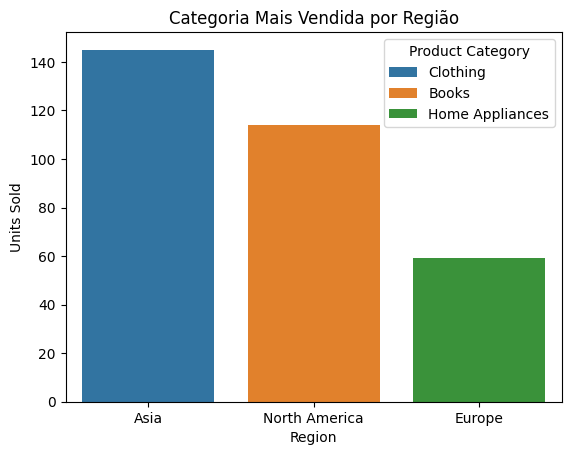

In [129]:
# Criando o gráfico de barras com a categoria mais vendida por região
sns.barplot(x='Region', y='Units Sold', hue='Product Category', data=venda_categoria_regiao_max_reset)
# Inclinando os rótulos do eixo X para melhor leitura
plt.title('Categoria Mais Vendida por Região')
plt.show()

In [130]:
vendas_produtos_regiao = data.groupby(['Region', 'Product Name'])['Units Sold'].sum().sort_values(ascending=False)
vendas_produtos_regiao

Region         Product Name                           
Asia           Hanes ComfortSoft T-Shirt                  10
North America  The Catcher in the Rye by J.D. Salinger     7
Asia           Nike Air Force 1                            6
               Gap Essential Crewneck T-Shirt              6
               Spalding NBA Street Basketball              6
                                                          ..
Europe         Sunday Riley Luna Sleeping Night Oil        1
               Sunday Riley Good Genes                     1
               Shiseido Ultimate Sun Protector             1
               Cuisinart Custom 14-Cup Food Processor      1
               Instant Pot Duo Crisp                       1
Name: Units Sold, Length: 233, dtype: int64

In [131]:
# Agrupar por região e produto, somar as unidades vendidas, e ordenar dentro de cada região
top_5_produtos_regiao = data.groupby(['Region', 'Product Name'])['Units Sold'].sum().groupby('Region', group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5))

print(top_5_produtos_regiao)

Region         Product Name                                    
Asia           Hanes ComfortSoft T-Shirt                           10
               Spalding NBA Street Basketball                       6
               Yeti Rambler Tumbler                                 6
               Gap Essential Crewneck T-Shirt                       6
               Nike Air Force 1                                     6
Europe         Dyson Supersonic Hair Dryer                          3
               Keurig K-Elite Coffee Maker                          3
               Instant Pot Duo                                      3
               Eufy RoboVac 11S                                     3
               Shark IQ Robot Vacuum                                2
North America  The Catcher in the Rye by J.D. Salinger              7
               The Silent Patient by Alex Michaelides               5
               The Girl with the Dragon Tattoo by Stieg Larsson     5
               1984 by Geo

In [132]:
# Selecionar os 5 produtos mais vendidos em cada região
top_5_produtos_asia = vendas_produtos_regiao.loc['Asia'].head(5)
top_5_produtos_europe = vendas_produtos_regiao.loc['Europe'].head(5)
top_5_produtos_north_america = vendas_produtos_regiao.loc['North America'].head(5)

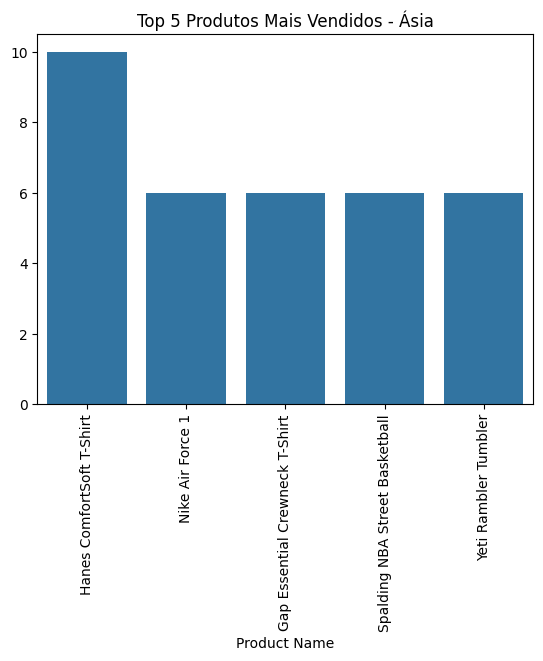

In [133]:
# Gráfico para os 5 produtos mais vendidos na Ásia
sns.barplot(x=top_5_produtos_asia.index, y=top_5_produtos_asia.values)
plt.title('Top 5 Produtos Mais Vendidos - Ásia')
plt.xticks(rotation=90)
plt.show()


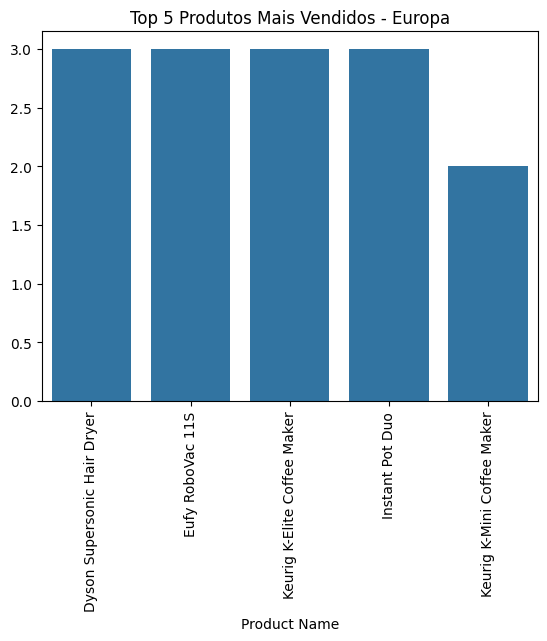

In [134]:
# Gráfico para os 5 produtos mais vendidos na Ásia
sns.barplot(x=top_5_produtos_europe.index, y=top_5_produtos_europe.values)
plt.title('Top 5 Produtos Mais Vendidos - Europa')
plt.xticks(rotation=90)
plt.show()

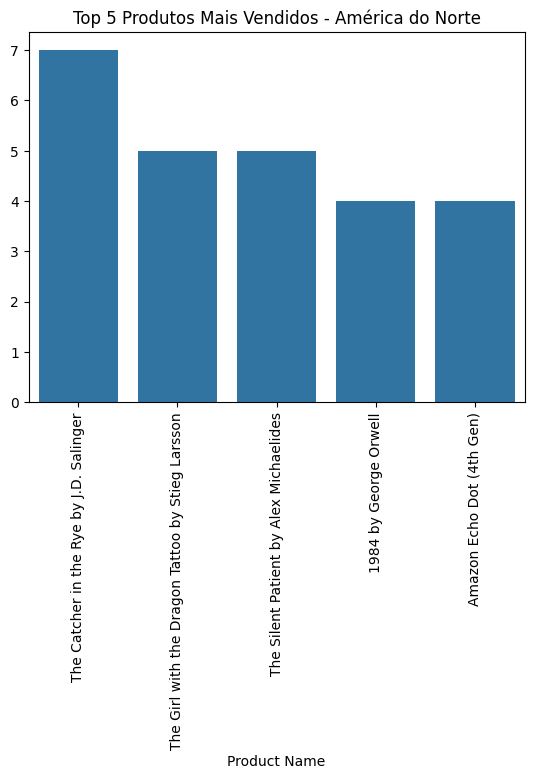

In [135]:
# Gráfico para os 5 produtos mais vendidos na Ásia
sns.barplot(x=top_5_produtos_north_america.index, y=top_5_produtos_north_america.values)
plt.title('Top 5 Produtos Mais Vendidos - América do Norte')
plt.xticks(rotation=90)
plt.show()


In [136]:
vendas_metodo_regiao = data.groupby(['Region', 'Payment Method'])['Units Sold'].sum().sort_values(ascending=False)
vendas_metodo_regiao

,,Units Sold
Region,Payment Method,
North America,Credit Card,180
Asia,Debit Card,145
Europe,PayPal,105
Asia,Credit Card,88


In [137]:
# Selecionar a categoria mais vendida em cada região
principal_metodo_regiao = vendas_metodo_regiao.groupby('Region').head(1)

print(principal_metodo_regiao)

Region         Payment Method
North America  Credit Card       180
Asia           Debit Card        145
Europe         PayPal            105
Name: Units Sold, dtype: int64


In [138]:
# Resetando o índice para transformar o MultiIndex em colunas
principal_metodo_regiao_reset = principal_metodo_regiao.reset_index()
principal_metodo_regiao_reset

,Region,Payment Method,Units Sold
0,North America,Credit Card,180
1,Asia,Debit Card,145
2,Europe,PayPal,105


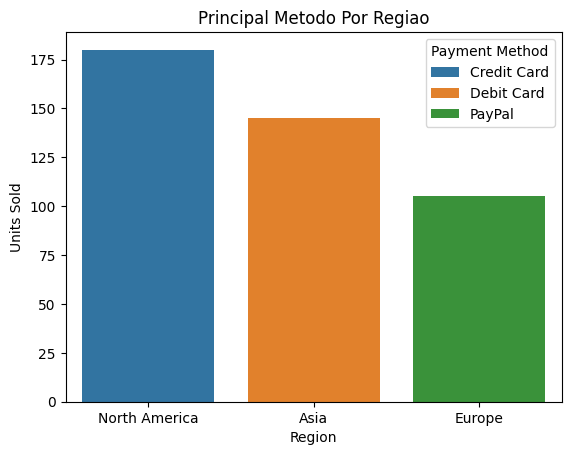

In [139]:
# Criando o gráfico de barras com metodo usado por região
sns.barplot(x='Region', y='Units Sold', hue='Payment Method', data=principal_metodo_regiao_reset)
# Inclinando os rótulos do eixo X para melhor leitura
plt.title('Principal Metodo Por Regiao')
plt.show()

In [140]:
vendas_periodo_regiao = data.groupby(['Region', 'mes_ano'])['Units Sold'].sum().sort_values(ascending=False)
vendas_periodo_regiao

Region         mes_ano
Asia           2024-03    40
               2024-02    34
               2024-01    33
               2024-04    28
North America  2024-02    28
Asia           2024-05    27
               2024-06    27
North America  2024-03    27
               2024-01    24
               2024-04    24
Asia           2024-07    23
               2024-08    21
North America  2024-06    21
               2024-08    20
               2024-05    18
               2024-07    18
Europe         2024-03    15
               2024-02    15
               2024-05    15
               2024-06    13
               2024-04    13
               2024-07    12
               2024-08    11
               2024-01    11
Name: Units Sold, dtype: int64

In [141]:
# Selecionar a categoria mais vendida em cada região
principal_periodo_regiao = vendas_periodo_regiao.groupby('Region').head(1)

print(principal_periodo_regiao)

Region         mes_ano
Asia           2024-03    40
North America  2024-02    28
Europe         2024-03    15
Name: Units Sold, dtype: int64


In [142]:
principal_periodo_regiao_reset = principal_periodo_regiao.reset_index()
principal_periodo_regiao_reset

,Region,mes_ano,Units Sold
0,Asia,2024-03,40
1,North America,2024-02,28
2,Europe,2024-03,15


In [183]:
# Convertendo 'mes_ano' de Period para Timestamp (datetime)
vendas_por_regiao_mes['mes_ano'] = vendas_por_regiao_mes['mes_ano'].dt.to_timestamp()


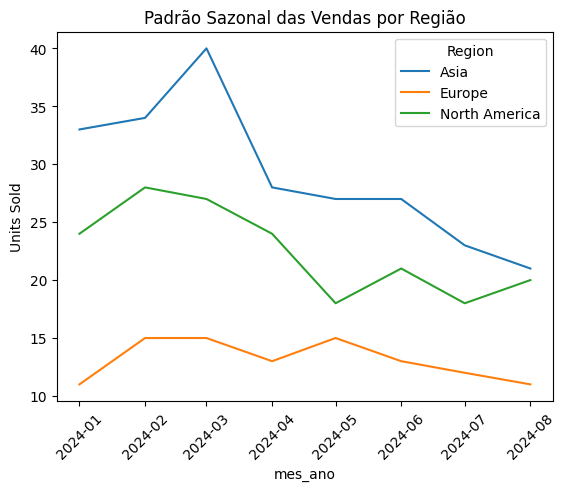

In [184]:
# Criando o gráfico de linha
sns.lineplot(x='mes_ano', y='Units Sold', hue='Region', data=vendas_por_regiao_mes)

# Ajustando a visualização
plt.title('Padrão Sazonal das Vendas por Região')
plt.xticks(rotation=45)
plt.show()

In [185]:
total_vendas_regiao = data.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)
total_vendas_regiao

,Units Sold
Region,
Asia,233
North America,180
Europe,105


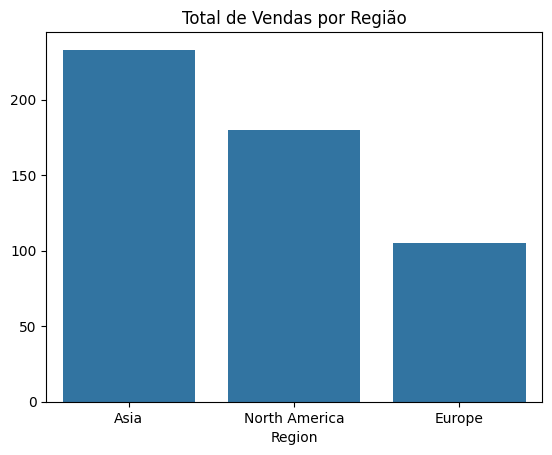

In [186]:
sns.barplot(x=total_vendas_regiao.index, y=total_vendas_regiao.values)
plt.title('Total de Vendas por Região')
plt.show()
#

In [188]:
# Calculando a receita total (Unidades Vendidas * Preço Unitário)
data['Total Revenue'] = data['Units Sold'] * data['Unit Price']

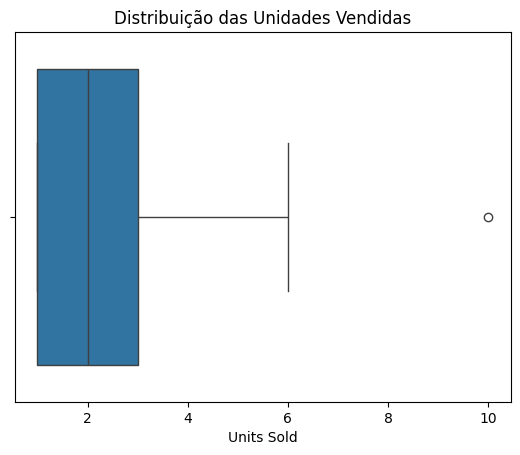

In [196]:
sns.boxplot(x='Units Sold', data=data)
plt.title('Distribuição das Unidades Vendidas')
plt.show()


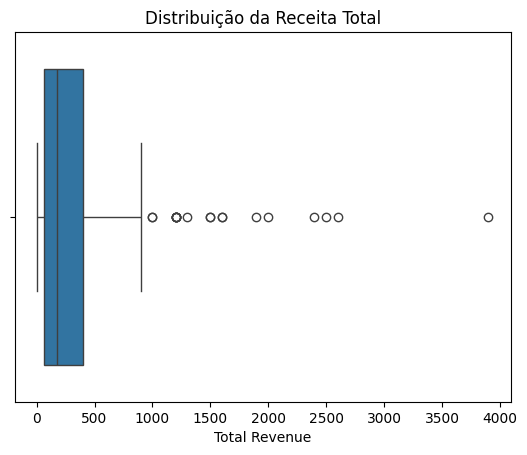

In [197]:
sns.boxplot(x='Total Revenue', data=data)
plt.title('Distribuição da Receita Total')
plt.show()


In [199]:
#calcular a receita total por categoria de produto
receita_total_categoria = data.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)
receita_total_categoria

,Total Revenue
Product Category,
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52
Clothing,8128.93
Beauty Products,2621.90
Books,1861.93


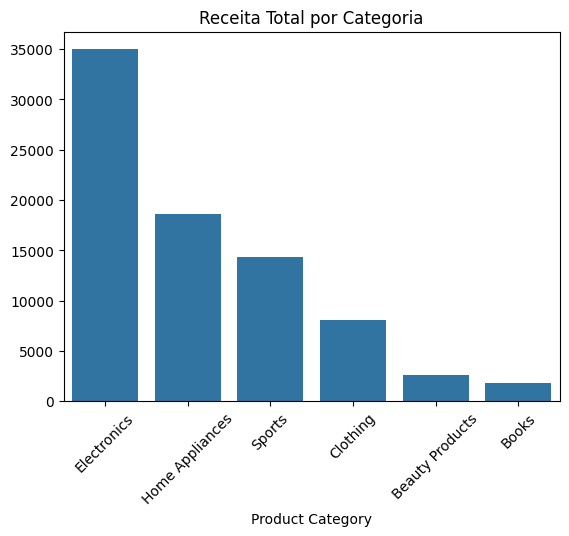

In [200]:
# Criando o gráfico de barras para a receita total por categoria
sns.barplot(x=receita_total_categoria.index, y=receita_total_categoria.values)

# Ajustando a visualização
plt.title('Receita Total por Categoria')
plt.xticks(rotation=45)
plt.show()

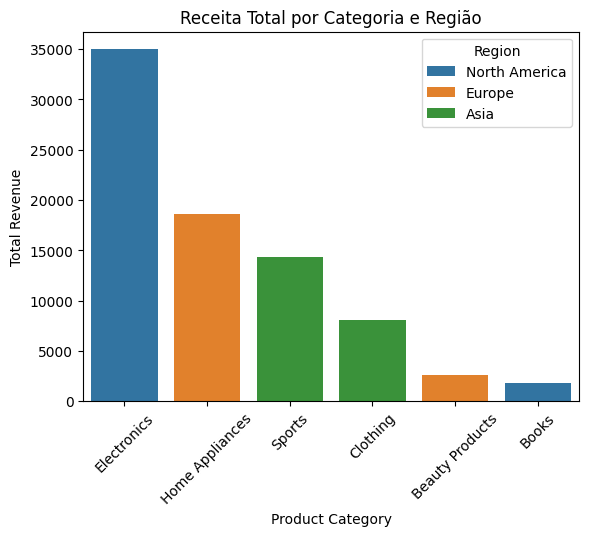

In [201]:
# Agrupar por região e categoria de produto e somar a receita total
receita_regiao_categoria = data.groupby(['Region', 'Product Category'])['Total Revenue'].sum().sort_values(ascending=False)

# Resetando o índice para facilitar a visualização
receita_regiao_categoria_reset = receita_regiao_categoria.reset_index()

# Criando o gráfico de barras para receita por região e categoria
sns.barplot(x='Product Category', y='Total Revenue', hue='Region', data=receita_regiao_categoria_reset)

# Ajustando a visualização
plt.title('Receita Total por Categoria e Região')
plt.xticks(rotation=45)
plt.show()